## Hotel Bookings Dataset

This datase will be used for a EDA (Explanatory Data Analysis) to analyse the data regarding hotel bookings. We will try to gain some understanding on the data and extract some relevant inferences from it.

In [30]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pprint import pprint

import seaborn as sns

In [4]:
htl_df = pd.read_csv('./dataset/hotel_bookings.csv', parse_dates=['reservation_status_date'])
htl_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [11]:
htl_df.info() #Check datatypes
htl_df.isnull().sum().sort_values(ascending=False) #Check nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

company                           112593
agent                              16340
country                              488
children                               4
arrival_date_month                     0
arrival_date_week_number               0
hotel                                  0
is_canceled                            0
stays_in_weekend_nights                0
arrival_date_day_of_month              0
adults                                 0
stays_in_week_nights                   0
babies                                 0
meal                                   0
lead_time                              0
arrival_date_year                      0
distribution_channel                   0
market_segment                         0
previous_bookings_not_canceled         0
is_repeated_guest                      0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
previous_cancellations                 0
deposit_type    

In [25]:
htl_df = htl_df.drop(columns=['company'])
htl_df['agent'] = htl_df['agent'].astype(pd.Int64Dtype())

In [26]:
# Percentage of Agent
agent_freq = ((htl_df.agent.value_counts() * 100. / htl_df.shape[0]).to_dict())
sorted(agent_freq.items(), key=lambda item: item[1], reverse=True)

[(9, 26.770248764553145),
 (240, 11.660943127565123),
 (1, 6.023117514029651),
 (14, 3.048831560432197),
 (7, 2.964234860541084),
 (6, 2.755674679621409),
 (250, 2.403886422648463),
 (241, 1.441494262501047),
 (28, 1.3954267526593518),
 (8, 1.2681129072786665),
 (3, 1.11902169360918),
 (37, 1.0302370382779127),
 (19, 0.8886841444007035),
 (40, 0.8702571404640255),
 (314, 0.7764469386045733),
 (21, 0.7328922020269705),
 (229, 0.6583465951922272),
 (242, 0.6533210486640422),
 (83, 0.582963397269453),
 (29, 0.5720747131250523),
 (171, 0.5084177904347098),
 (12, 0.4841276488818159),
 (85, 0.46402546276907614),
 (20, 0.4522991875366446),
 (96, 0.4497864142725521),
 (243, 0.4305218192478432),
 (30, 0.4053940866069185),
 (134, 0.40371890443085684),
 (298, 0.39534299355054864),
 (27, 0.3769159896138705),
 (15, 0.336711617388391),
 (26, 0.3358740263003602),
 (11, 0.33084847977217524),
 (22, 0.31995979562777455),
 (56, 0.3140966580115588),
 (273, 0.29231928972275734),
 (177, 0.29064410754669573)

In [28]:
htl_df['agent'] = htl_df['agent'].fillna(0)

# does not make sense to keep as predictor
htl_df.drop(columns=['agent'], inplace=True)

In [29]:
htl_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

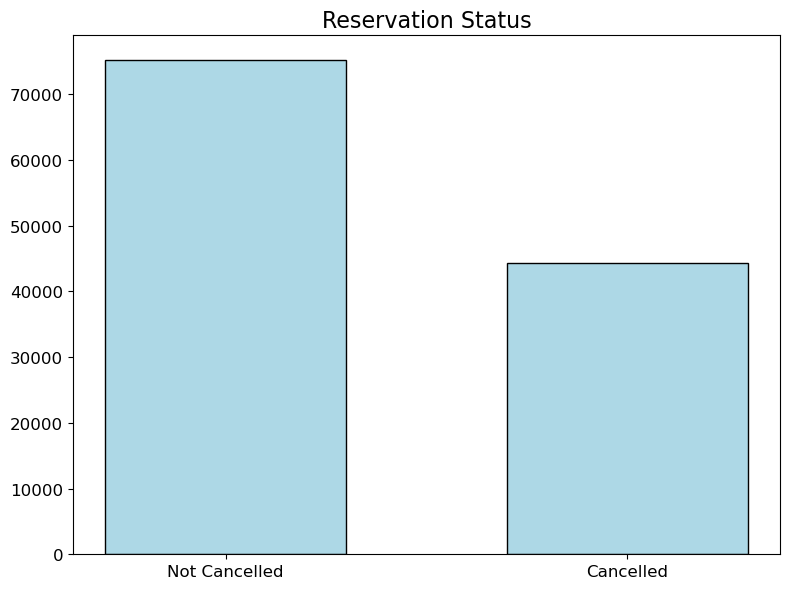

In [37]:
cancelled_perc = htl_df['is_canceled'].value_counts(normalize=True)

# Define color palette
colors = sns.color_palette(["#85C1E9", "#EDBB99"])

# Plot
plt.figure(figsize=(8, 6))  # Set background color to light gray
plt.title('Reservation Status', fontsize=16, color='Black')
plt.bar(['Not Cancelled', 'Cancelled'], htl_df['is_canceled'].value_counts(), edgecolor='black', width=0.6, color="lightblue")
plt.xticks(fontsize=12, color='Black')
plt.yticks(fontsize=12, color='Black')
plt.tight_layout()
plt.show()

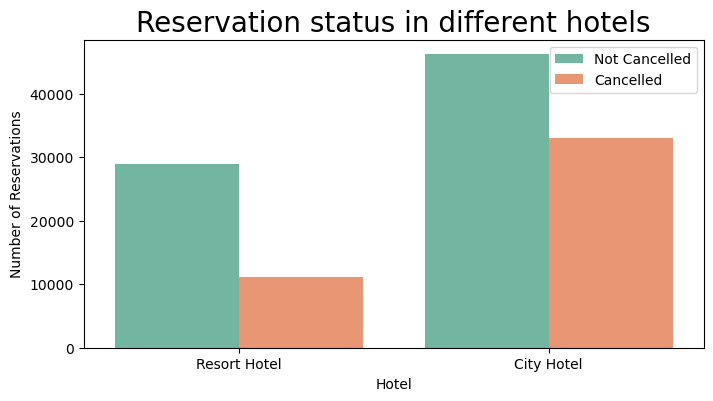

In [39]:
plt.figure(figsize=(8, 4))

# Create the countplot
ax1 = sns.countplot(x='hotel', hue='is_canceled', data=htl_df, palette="Set2")

# Customize legend location
legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1, 1))

# Set plot title and axis labels
plt.title('Reservation status in different hotels', size=20, color='Black')
plt.xlabel('Hotel',color='Black')
plt.ylabel('Number of Reservations', color='Black')

# Customize legend labels
plt.legend(['Not Cancelled', 'Cancelled'])

# Show the plot
plt.show()

In [49]:
htl_df.groupby(['hotel'])['is_canceled'].agg(lambda val: val.sum() / val.shape[0])

hotel
City Hotel      0.417270
Resort Hotel    0.277634
Name: is_canceled, dtype: float64

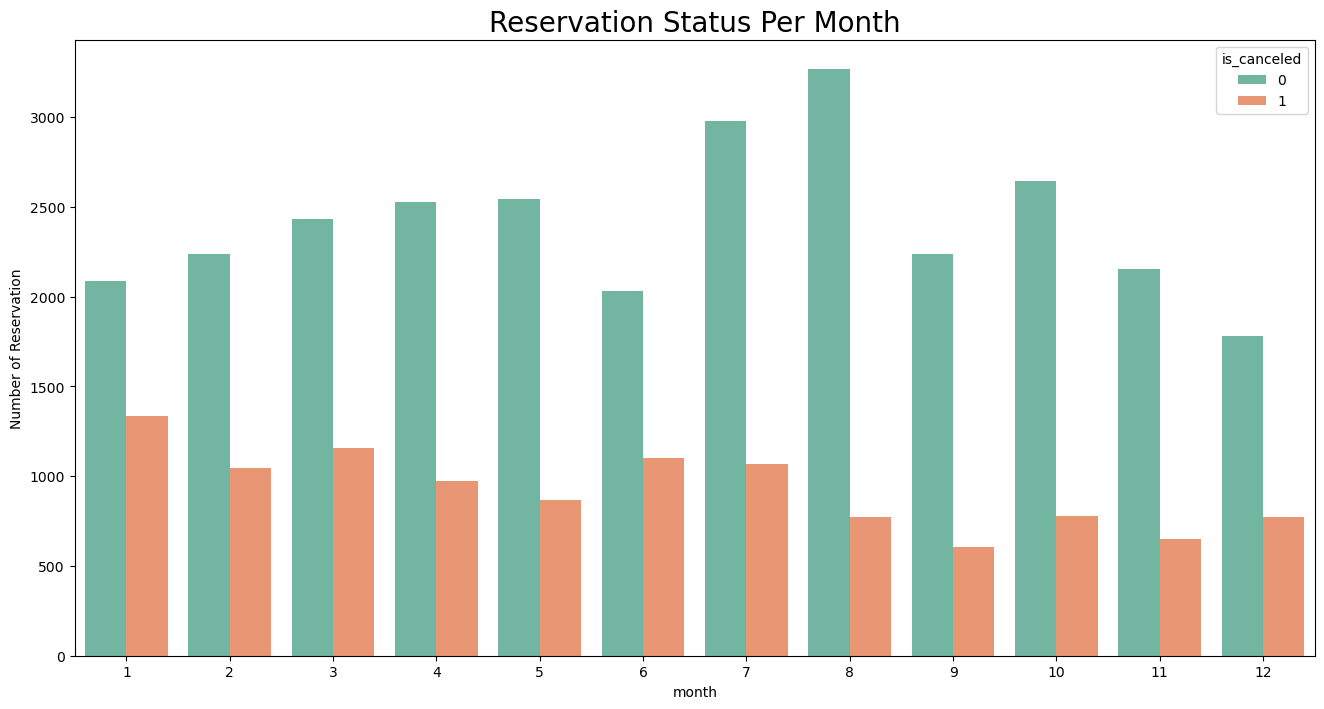

In [61]:
htl_df['month'] = htl_df['reservation_status_date'].dt.month
plt.figure(figsize=(16,8))
ax1 = sns.countplot(x='month', hue='is_canceled', data= htl_df[htl_df.hotel == 'Resort Hotel'], palette = 'Set2')
legend_lebels,_ = ax1.get_legend_handles_labels()
plt.title('Reservation Status Per Month', size = 20)
plt.xlabel('month')
plt.ylabel('Number of Reservation')
plt.show()

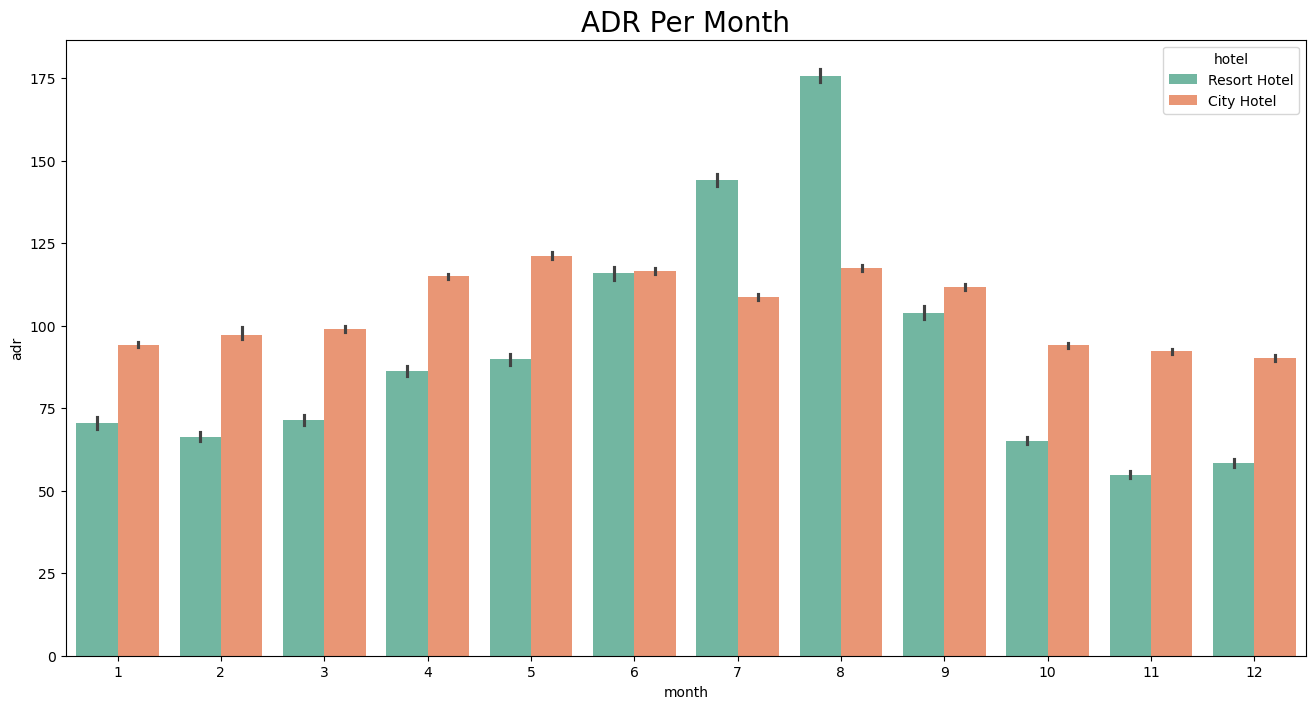

In [56]:
htl_df['month'] = htl_df['reservation_status_date'].dt.month
plt.figure(figsize=(16,8))
ax1 = sns.barplot(x='month', y='adr', hue='hotel', data= htl_df, estimator=np.mean, palette = 'Set2')
legend_lebels,_ = ax1.get_legend_handles_labels()
plt.title('ADR Per Month', size = 20)
plt.xlabel('month')
plt.show()